In [1]:
import sys  
sys.path.insert(0, '..')

import pandas as pd
# from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from src.visualisation.visualisation import visualize_monthly_avg_sleep, visualize_weekly_avg_sleep

In [3]:
path = '../data/sleep.csv'

sleep = pd.read_csv(path, index_col='date', parse_dates=['date'])

In [4]:
sleep['night_sleep_hours'] = sleep['night_sleep_hours'].replace(to_replace=0, value=sleep['night_sleep_hours'].mean())

In [5]:
sleep[sleep['night_sleep_hours'] == 0]

,total_sleep_hours,night_sleep_hours,nap_hours
date,,,


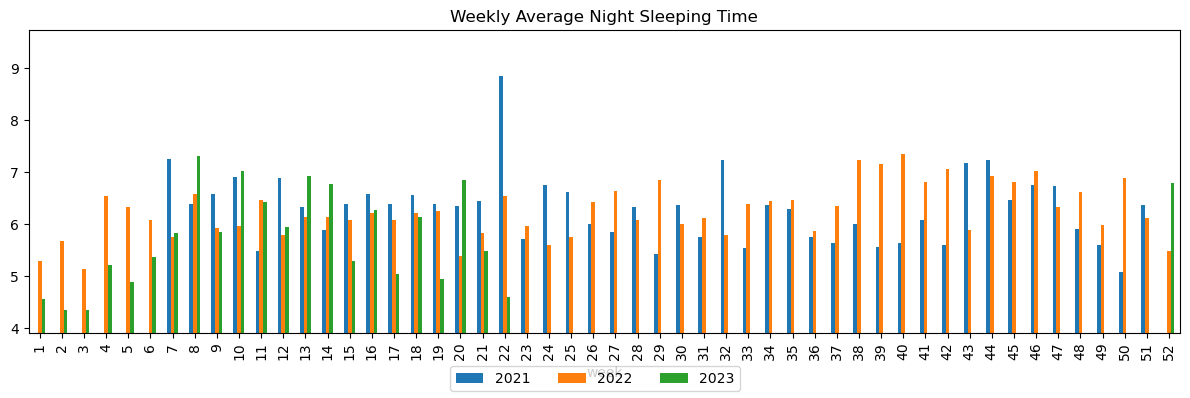

In [10]:
visualize_weekly_avg_sleep(sleep['night_sleep_hours'])

In [274]:
sleep = sleep.replace(0, sleep.mean())

In [275]:
sleep = sleep.resample('W').mean()

In [282]:
sleep.index.isocalendar().week

date
2021-02-21     7
2021-02-28     8
2021-03-07     9
2021-03-14    10
2021-03-21    11
              ..
2023-05-07    18
2023-05-14    19
2023-05-21    20
2023-05-28    21
2023-06-04    22
Freq: W-SUN, Name: week, Length: 120, dtype: UInt32

In [149]:
sleep_21 = sleep[sleep.index.year == 2021][1:]
sleep_22 = sleep[sleep.index.year == 2022]
sleep_23 = sleep[sleep.index.year == 2023][:-1]

In [283]:
sleep.index = [ser.index.strftime('%m-%d'), ser.index.year]


In [288]:
sleep = sleep.unstack()

In [287]:
sleep.index = pd.to_datetime(sleep.index,format='%m-%d').month_name()

ValueError: time data "(7, 2021)" doesn't match format "%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [239]:
sleep

total_sleep_hours                    
date                   2021      2022      2023
date                                           
January                 NaN  6.596960  6.695484
February           7.255556  7.214286  7.297500
March              6.975806  7.008065  7.830323
April              6.950000  7.116667  7.151000
May                6.832444  7.112903  6.914057
June               7.505000  7.046667  6.240000
July               7.024380  7.045348       NaN
August             7.000000  6.789268       NaN
September          6.265385  7.332052       NaN
October            6.387097  7.677978       NaN
November           7.104333  7.277333       NaN
December           5.983871  7.723871       NaN

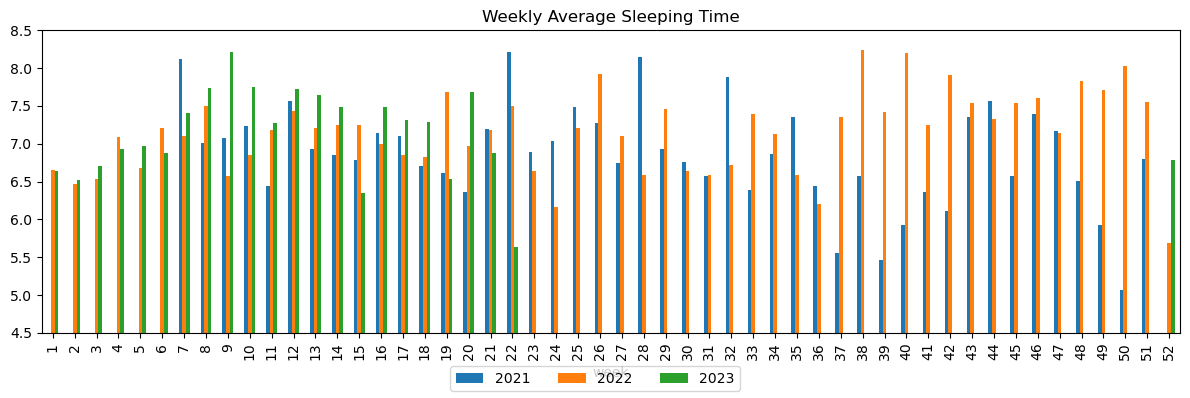

In [295]:
fig, ax = plt.subplots(figsize=(12,4))

# ax.bar(sleep_21['dayofyear'], sleep_21['total_sleep_hours'], label='2021')
# ax.bar(sleep_22['dayofyear'], sleep_22['total_sleep_hours'], label='2022')
# ax.bar(sleep_23['dayofyear'], sleep_23['total_sleep_hours'], label='2023')



sleep['total_sleep_hours'].plot(kind='bar',ax=ax, legend=False)

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']


fig.legend(loc='lower center', ncol=3)
ax.set_ylim([4.5, 8.5])

ax.set_title('Weekly Average Sleeping Time')

fig.tight_layout()
plt.show()

In [296]:
sleep.max().max() * 1.2

8.235714285714286

In [300]:
sleep.min().min() * 0.8

4.057142857142857

In [66]:
res = MSTL(sleep, periods=(28, 126), iterate=5).fit()

<Axes: xlabel='date'>

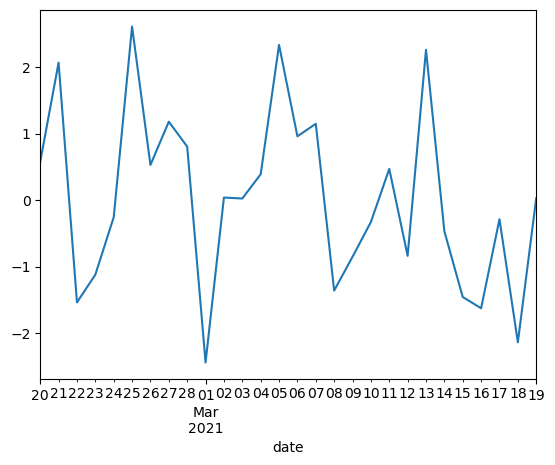

In [72]:
res.seasonal['seasonal_28'][0:28].plot()

<Axes: xlabel='date'>

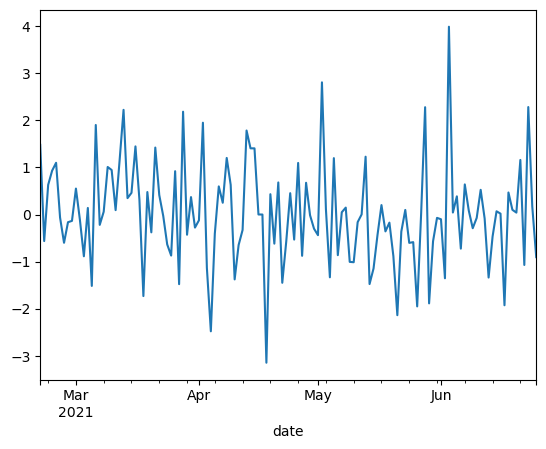

In [73]:
res.seasonal['seasonal_126'][0:126].plot()

In [69]:
126 / 7 / 4

4.5